<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week4_2_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##사이킷런
###**5. 데이터 전처리**
- 기본 사항 : 결손값, NaN, Null 값 처리 -> 고정된 다른 값으로 변환 / drop 처리
- 문자열 피처 : 카테고리형, 텍스트형 피처 의미 - 텍스트형은 피처 벡터화를 통해 처리

**데이터 인코딩**
- 레이블 인코딩 방식 : 카테고리 피처를 코드형 숫자값으로 변환

    Ex) 1.냉장고 2.전자레인지 3.컴퓨터
    
    - 구현 : LabelEncoder 클래스로 구현. fit()과 transform() 호출해서 레이블 인코딩 수행
    - 선형회귀와 같은 ML 알고리즘 적용 X, 트리 계열의 ML 알고리즘 O
- 원-핫 인코딩 : 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
    - 구현 : 사이킷런에서 OneHotEncoder 클래스로 변환가능, 2차원데이터 입력 필요, 변환값을 희소 행렬-> 밀집행렬 변환해야함. (toarray() 메서드 이용)
    - 판다스 API : *get_dummies() 이용* 시 바로 변환 가능
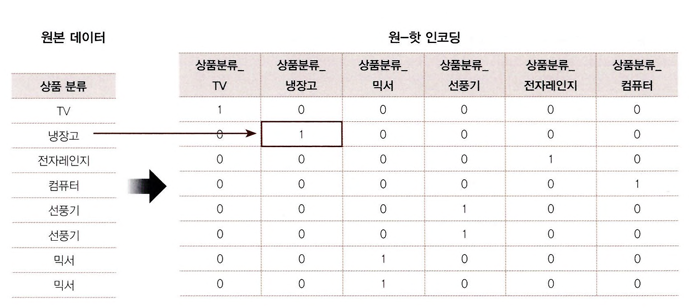


In [2]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder= LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [3]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환합니다.
items= np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용합니다.
oh_encoder= OneHotEncoder()
oh_encoder.fit(items)
oh_labels= oh_encoder.transform(items)

#원-핫 인코딩 데이터를 밀집 행렬로 출력합니다.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [5]:
import pandas as pd

#데이터프레임 안에 중괄호{}로 문자열 카테고리 값 넣기
df= pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


###**피처 스케일링과 정규화**
: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화 : 데이터와 피처 각각이 가우시안 정규 분포 가진 값으로 변환 Xn= X-mean(x) / std(x)
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기 변환 Yn= Y-min(y) / max(y)-min(y)

**StandardScaler**
: 표준화 클래스
- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신이나 선형회귀, 로지스틱 회귀에서 필요 (정규분포 가정했기 때문)

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris=load_iris()
iris_data=iris.data #데이터를 지정
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler= StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df) #데이터의 통계값 기억하는 과정-> 같은 스케일에서 비교하려고
iris_scaled= scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


###**MinMaxScaler**
: 데이터값을 0과 1 사이 범위 값으로 변환 (음수 존재 시 -1~1) -> 가우시안 분포 아닐 시 적용 가능
- Min, Max Scale 적용

In [8]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler= MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled= scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**
- StandardScaler, MinMaxScaler로 스케일링 변환 시 fit(), transform(), fit_transform() 메서드 이용
     
    -> 주의점 !! 학습 데이터 세트로 위 메서드 적용한 후 테스트 데이터 세트로는 fit()을 수행하지 않고 학습 데이터 세트로 fit() 수행 결과를 이용해 transform() 변환을 적용해야한다. (스케일링 기준 정보가 서로 달라지기 때문)
- fit_tranform() 이용해 스케일링 변환 시에도 테스트 데이터에서 사용하면 안됨

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1) #"행 = 데이터 개수", "열 = 특성 개수" 구조로 맞춰줌
test_array=np.arange(0,6).reshape(-1,1)

#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler= MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1 로 변환됨.
train_scaled= scaler.transform(train_array)

#다시 1차원으로 펴주기 flatten
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 변환하는데, fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인해보자.

In [10]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled= scaler.transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [11]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled= scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled= scaler.transform(test_array) #fit()없이 바로
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


#6. 사이킷런으로 수행하는 타이타닉 생존자 예측


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df= pd.read_csv("/content/train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
print('\n### 학습 데이터 정보 ###\n')
print(titanic_df.info())

#object타입은 string으로 봐도 무방


### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
#Null 값 처리하기 - Age Cabin Embarked
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #True-> 원본 변형
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())
#sum 2번 -> 열 별로 + 총합 더함

데이터 세트 Null 값 갯수  0


/tmp/ipython-input-1670005641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #True-> 원본 변형
/tmp/ipython-input-1670005641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [15]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

#Cabin 값이 특이함, 분류가 잘 안된듯

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포 :
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [16]:
# Cabin속성의 앞 문자만 추출하기
titanic_df['Cabin']= titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [17]:
#어떤 유형의 승객이 생존확률 높았을지 확인
#성별
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

#성별, 생존여부를 묶어서 Survived 컬럼의 결측치가 아닌 값 개수 센다.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

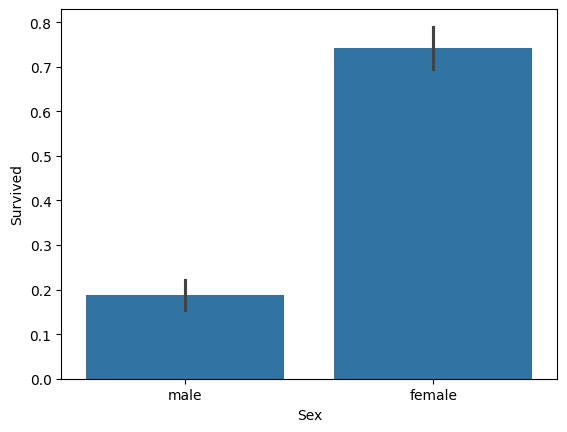

In [18]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

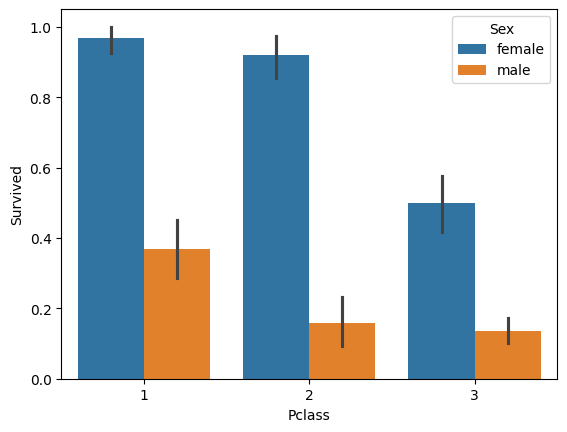

In [19]:
#부자와 가난한 사람 - 객실등급
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=titanic_df)

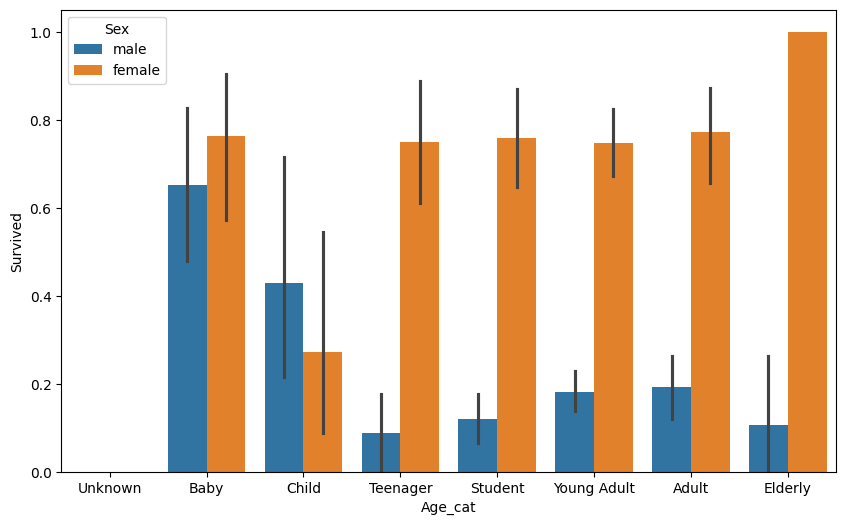

In [20]:
#나이 카테고리 분류
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat=""
    if age<= -1: cat= 'Unknown'
    elif age<= 5: cat= 'Baby'
    elif age<=12: cat= "Child"
    elif age<=18: cat= 'Teenager'
    elif age<=25: cat= 'Student'
    elif age<= 35: cat= 'Young Adult'
    elif age<= 60: cat= 'Adult'
    else: cat= 'Elderly'

    return cat

#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names= ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda식에 위에서 생성한 get_category()함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하기

    -> LabelEncoder 클래스로 레이블 인코딩 => 숫자 값으로 변환시킴

In [21]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]= le.transform(dataDF[feature])

    return dataDF

titanic_df= encode_features(titanic_df)
titanic_df.head(4)

#문자열 속성이 숫자형으로 바뀜

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3


- 전처리 호출 함수 - transform_features() + Null 처리, 피처 제거, 인코딩 수행하는 내부 함수들
- 불필요한 피처 제거 - drop_features(df)로 수행




In [22]:
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)

    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행 : 문자 -> 숫자형으로
def format_features(df):
    df['Cabin']= df['Cabin'].str[:1] #맨 앞 문자 가져오기
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df= fillna(df)
    df= drop_features(df)
    df= format_features(df)
    return df

In [23]:
#원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df= pd.read_csv("/content/train.csv")
y_titanic_df= titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1) #피처 데이터 세트 만들기

X_titanic_df= transform_features(X_titanic_df) #전처리 수행

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

/tmp/ipython-input-3181322818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3181322818.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

사이킷런 기반의 머신러닝 코드
- 결정트리 : DecisionTreeClassifier
- 랜덤포레스트 : RandomForestClassifier
- 로지스틱 회귀 : LogisticRegression
  - 생성인자 solver='liblinear'는 최적화 알고리즘을 liblinear로 설정하는 것 (작은 데이터 셋에서 이진분류 시 성능 좋음)

  => train_test_split() 으로 학습, 테스트 데이터 분리
  
  => 예측 평가는 accuracy_score() API사용

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf= DecisionTreeClassifier(random_state=11)
rf_clf= RandomForestClassifier(random_state=11)
lr_clf= LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred= rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred= lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


**교차검증**
- 결정트리 모델 평가
- KFold, cross_val_score(), GridSearchCV 클래스 사용

In [25]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold= KFold(n_splits=folds)
    scores=[]

    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test= X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions= clf.predict(X_test)
        accuracy= accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    #5개 fold에서의 평균 정확도 계산.
    mean_score= np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [26]:
#cross_val_score()로 교차검증
from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:  0.7430
교차 검증 1 정확도:  0.7753
교차 검증 2 정확도:  0.7921
교차 검증 3 정확도:  0.7865
교차 검증 4 정확도:  0.8427
평균 정확도: 0.7879


>GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 보자.

>CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_
samples_split, min_samples_leaf를 변경하면서 성능을 측정한다.

>최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력해보자.

In [27]:
#GridSearchCV 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터 찾고 예측 성능 측정
#하이퍼 파라미터 - max_depth, min_samples_split, min_samples_leaf 변경하며 성능측정

from sklearn.model_selection import GridSearchCV

parameters= {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf= GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf= grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions= best_dclf.predict(X_test)
accuracy= accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


#**CH3. 평가 (for 분류)**
> 머신러닝 = 데이터 가공/변환 - 모델 학습/예측 - 평가 프로세스
- 예측 성능 평가 방법
  - 정확도 (accuracy)
  - 오차행렬 (Confusion Matrix)
  - 정밀도 (Precision)
  - 재현율 (Recall)
  - F1 스코어
  - ROC AUC
- 분류 : 이진 분류와 멀티 분류

###1. 정확도 (Accuracy)
> 정확도 = (예측 결과가 동일한 데이터 건수) / (전체 예측 데이터 건수)
- 직관적인 모델 예측 성능 평가
- 이진 분류 -> ML모델의 성능 왜곡할수있음
- 불균형한 레이블 데이터 세트에서 성능 수치로 사용되면 안됨

In [28]:
#학습 없이 성별에 따라 생존자 예측하는 단순한 classifier 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass

    #predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1)) #행은 데이터 샘플 수, 열은 1개
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)

    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행 : 문자 -> 숫자형으로
def format_features(df):
    df['Cabin']= df['Cabin'].str[:1] #맨 앞 문자 가져오기
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df= fillna(df)
    df= drop_features(df)
    df= format_features(df)
    return df

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


/tmp/ipython-input-1801009992.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1801009992.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [30]:
#불균형한 데이터 세트와 Dummy Classifier 생성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    #입력값으로 들어오는 x데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier 로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


###**2. 오차 행렬**
: 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 함께 보여줌

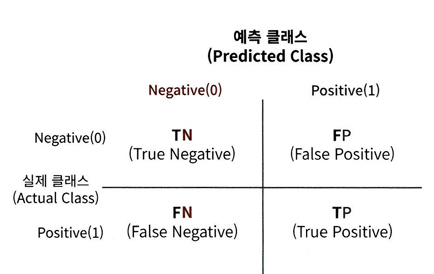

- confusion_matirx() API 제공

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

정확도= 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)
- 불균형한 레이블 클래스를 가지는 이진 분류 모델-> 찾아야하는 적은 수의 결괏값에 Positive 설정해 1값 부여, 아닌 경우 Negative로 0값 부여


###**3.정밀도와 재현율**
: Positive 데이터 세트의 예측 성능에 초점 맞춤
- 정밀도 = TP/(FP+TP) : 예측을 Positive로 한 대상 중 예측과 실제값이 positive로 일치
  - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되
면 업무상 큰 영향이 발생하는 경우 중요
  - 스팸 메일 사례

  => **precision_score()**
- 재현율 = TP/(FN+TP) : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive인 데이터 건수 => 민감도, TPR
  - Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 중요
  - 보험 사기와 같은 금융 사기 적발 모델

  => **recall_score()**


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [33]:
#로지스틱 회귀 기반으로 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
#titanic_df= pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=150, random_state=11)
lr_clf= LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred= lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[94  6]
 [13 37]]
정확도: 0.8733, 정밀도: 0.8605, 재현율: 0.7400


/tmp/ipython-input-1801009992.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1801009992.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

###**정밀도/재현율 트레이드 오프**
: 두 수치는 상호보완적인 평가 지표여서 한 쪽을 높이면 다른 한 쪽이 떨어진다.
- 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(threshold) 조정-> 수치 높임
- **predict_proba()** 메서드 제공 -> 예측 확률 결과 반환 (첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두번째 칼럼이 클래스 값 1에 대한 예측 확률)
- **predict()** 메서드는 predict_proba() 호출 결과로 반환된 배열에서 임계값보다 큰 값이 들어있는 칼럼의 위치를 받아서 최종적으로 예측 클래스 결정


In [34]:
#데이터 학습한 LogisticRegression 객체에서 메서드 수행 후 반환
pred_proba= lr_clf.predict_proba(X_test)
pred= lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result= np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

# 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1 이 됩니다. 그리고 맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타나듯이,
# 두 개의 칼럼 중 에서 더 큰 확률 값으로 predict() 메서드가 최종 예측

pred_proba()결과 Shape: (150, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.45537309 0.54462691]
 [0.86863319 0.13136681]
 [0.86953484 0.13046516]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.45537309 0.54462691 1.        ]
 [0.86863319 0.13136681 0.        ]
 [0.86953484 0.13046516 0.        ]]


1. threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성합니다.
2. 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray 의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환

In [35]:
from sklearn.preprocessing import Binarizer

x=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

# x의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환.
binarizer= Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
#최종 예측값에 대해 get_clf_eval() 함수 적용-> 평가 지표 출력
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold=0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1= pred_proba[:,1].reshape(-1,1)

binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[94  6]
 [13 37]]
정확도: 0.8733, 정밀도: 0.8605, 재현율: 0.7400


In [37]:
#Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold=0.4
pred_proba_1= pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[86 14]
 [10 40]]
정확도: 0.8400, 정밀도: 0.7407, 재현율: 0.8000


In [38]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds= [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[86 14]
 [10 40]]
정확도: 0.8400, 정밀도: 0.7407, 재현율: 0.8000
임곗값: 0.45
오차행렬
[[91  9]
 [12 38]]
정확도: 0.8600, 정밀도: 0.8085, 재현율: 0.7600
임곗값: 0.5
오차행렬
[[94  6]
 [13 37]]
정확도: 0.8733, 정밀도: 0.8605, 재현율: 0.7400
임곗값: 0.55
오차행렬
[[96  4]
 [15 35]]
정확도: 0.8733, 정밀도: 0.8974, 재현율: 0.7000
임곗값: 0.6
오차행렬
[[98  2]
 [16 34]]
정확도: 0.8800, 정밀도: 0.9444, 재현율: 0.6800


- **precision_recall_curve()** 이용
    
    -> 여러 임곗값을 기준으로 정밀도와 재현율을 동시에 계산해주는 함수

In [39]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1= lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds= precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index= np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

#15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (137,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.21 0.28 0.43 0.62 0.8  0.94]
샘플 임계값별 정밀도: [0.333 0.37  0.421 0.458 0.543 0.672 0.776 0.97  0.944 1.   ]
샘플 임계값별 재현율: [1.   1.   0.96 0.88 0.88 0.86 0.76 0.64 0.34 0.04]


- 임곗값이 증가할수록 정밀도 값 상승, 재현율 값 감소
- precision_recall_curve()-> 정밀도와 재현율 곡선 시각화 가능

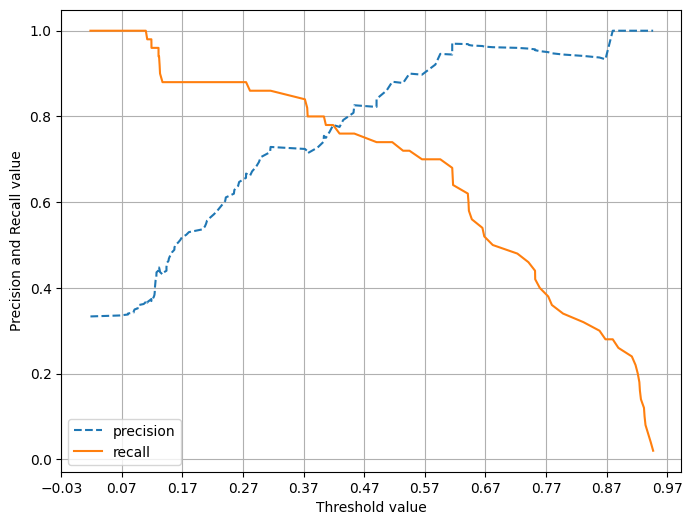

In [40]:
import matplotlib.pyplot as pit
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    #x축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    #threshold 값 X 축의 Scale을 0.1단위로 변경
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    #x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 정밀도 : 점선, 재현율 : 실선
- 임곗값 0.45 지점에서 두 수치 비슷

**정밀도와 재현율의 맹점**
- 둘 중 하나만 강조하면 안됨

###**4. F1 스코어**
: 정밀도와 재현율을 결합한 지표
> F1= 2*(precision * recall) / (precision + recall)
- f1_score() API

In [41]:
from sklearn.metrics import f1_score
f1= f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7957


In [42]:
# 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
def get_clf_eval(y_test, pred):
    confusion= confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall= recall_score(y_test, pred)

    #f1 스코어 추가
    f1= f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)

    #f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds= [0.4,0.45,0.50,0.55,0.60]
pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[86 14]
 [10 40]]
정확도: 0.8400, 정밀도: 0.7407, 재현율: 0.8000, F1:0.7692
임곗값: 0.45
오차 행렬
[[91  9]
 [12 38]]
정확도: 0.8600, 정밀도: 0.8085, 재현율: 0.7600, F1:0.7835
임곗값: 0.5
오차 행렬
[[94  6]
 [13 37]]
정확도: 0.8733, 정밀도: 0.8605, 재현율: 0.7400, F1:0.7957
임곗값: 0.55
오차 행렬
[[96  4]
 [15 35]]
정확도: 0.8733, 정밀도: 0.8974, 재현율: 0.7000, F1:0.7865
임곗값: 0.6
오차 행렬
[[98  2]
 [16 34]]
정확도: 0.8800, 정밀도: 0.9444, 재현율: 0.6800, F1:0.7907


###**5. ROC 곡선과 AUC**
: ROC곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 쓰이는 지표
- ROC (Receiver Operation Characteristic Curve) - 수신자 판단곡선
  - FPR (False Positive Rate) 변할 때 TPR (True Positive Rate) 가 어떻게 변하는지 나타냄 -> 각각 x축, y축
  - FPR : 재현율 (recall, 민감율) - (FP / FP+TN)
  - TNR : 특이성 - negative를 정확히 예측하는 수준 (TN / FP+TN)

=> ROC 곡선이 가운데로 멀어질수록 성능 뛰어남
=> x축(재현율)을 0부터 1까지 변경하면서 -> 분류 결정 임곗값을 1부터 0으로 변경함
*TN 음성진실 을 0으로 만들면 FPR 재현율이 1이된다*
- roc_curve() API
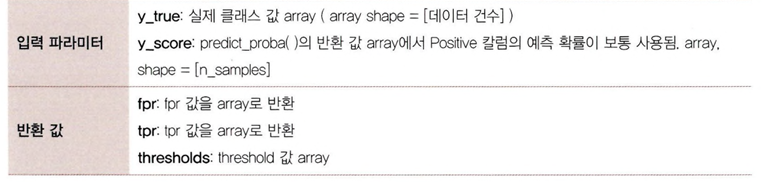

In [43]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출.
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index= np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

#5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

#임계값이 1에서 0으로 가까워지면서 FPR값이 커짐 + TPR 값이 더 가파르게 커짐.

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41]
샘플 index로 추출한 임곗값: [0.95 0.62 0.54 0.43 0.32 0.14 0.13 0.12 0.02]
샘플 임곗값별 FPR: [0.   0.01 0.04 0.11 0.16 0.54 0.6  0.75 1.  ]
샘플 임곗값별 TPR: [0.02 0.64 0.72 0.76 0.86 0.88 0.96 0.96 1.  ]


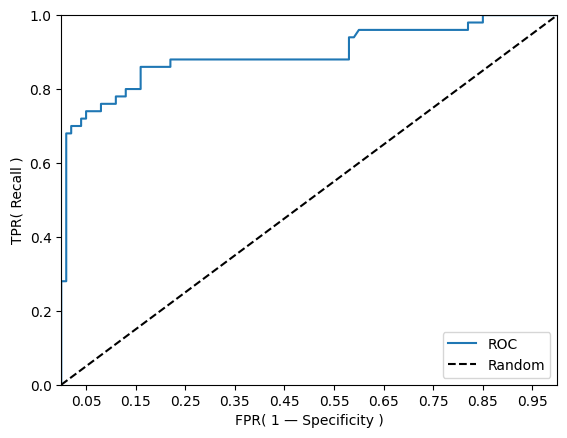

In [50]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 — Specificity )')
    pit.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1 ] )

- AUC (Area Under Curve) 값 : ROC 곡선 면적에 기반

In [51]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8933


In [53]:
#함수 변형 -> roc ruc 측정 추가 "get_clfLeval(y_test, pred=None, pred_proba=None)"
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test, pred)

    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)

    #ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

**피마 인디언 당뇨병 예측**
- 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
- 20세기 후반, 서구화된 식습관으로 당뇨 환자

[피처 구성]

- Pregnancies： 임신 횟수
- Glucose： 포도당 부하 검사 수치
- BloodPressure： 혈압(mm Hg)
- SkinThickness： 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin： 혈청 인슐린(m니 U/ml)
- BMI： 체질량지수(체중(kg)/(키(m))A2)
- DiabetesPedigreeFunction： 당뇨 내력 가중치 값
- Age： 나이
- Outcome： 클래스 결정 값(0또는 1

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [55]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출.
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC:0.8083


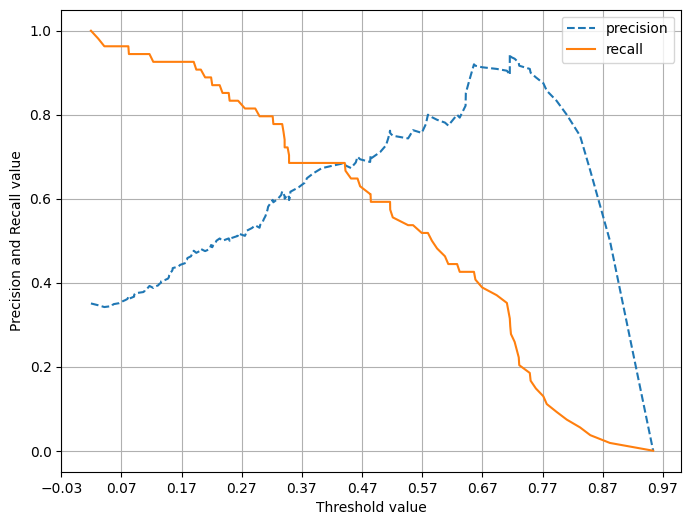

In [57]:
pred_proba_c1 =lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [58]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


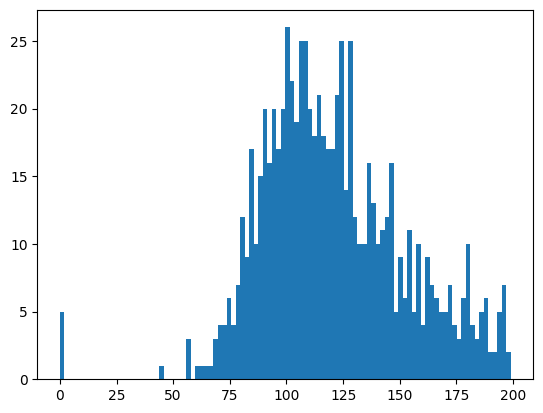

In [59]:
# Glucose 피처 = 포도당 수치 ->min 값이 0 인것있음
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [60]:
# 0값을 검사할 피처명 리스트
zero_features =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count= diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count= diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [61]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [63]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1 ]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [68]:
thresholds= [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_eval_by_threshold(y_test, pred_proba, thresholds)

ValueError: Expected 2D array, got 1D array instead:
array=[0.0355862  0.20064588 0.15758918 0.56670796 0.4143793  0.75445329
 0.83911687 0.15063653 0.19288439 0.10659361 0.66805395 0.39452842
 0.04654128 0.39059366 0.26365071 0.09217959 0.79321227 0.08834018
 0.58454942 0.80374567 0.41597844 0.34772736 0.06371282 0.31736429
 0.2978288  0.10406471 0.92106477 0.7491537  0.17253512 0.88831978
 0.22882312 0.23589299 0.1118924  0.15163212 0.10213109 0.74204642
 0.22071578 0.20673935 0.85301321 0.66324966 0.40991935 0.2348232
 0.7026734  0.12918857 0.34375315 0.01478719 0.46449803 0.08787669
 0.48681925 0.32872673 0.30970567 0.91797076 0.89721004 0.06086306
 0.1253885  0.42874806 0.06938726 0.3532583  0.32986375 0.39339519
 0.17910658 0.83697046 0.33331719 0.62371699 0.30335421 0.10262803
 0.2430963  0.71833894 0.14607407 0.76985418 0.05938518 0.33519877
 0.11911145 0.45695728 0.79012007 0.30264837 0.04011369 0.06526591
 0.10886847 0.24990815 0.10934698 0.08097619 0.82890348 0.17355102
 0.29007942 0.34566909 0.48277325 0.78485946 0.05840331 0.0227941
 0.04142268 0.61994634 0.86801298 0.24074719 0.28916208 0.69017142
 0.22108143 0.19696806 0.02994539 0.81621563 0.87972068 0.4083339
 0.41466945 0.33777312 0.10590025 0.14811142 0.29873679 0.46203805
 0.04068438 0.10509723 0.75115763 0.537085   0.14217994 0.1981287
 0.38416625 0.52855912 0.87480348 0.12505332 0.26873562 0.97636438
 0.53616523 0.48665668 0.71221871 0.65561712 0.25122988 0.21879294
 0.11132553 0.06327955 0.23463102 0.11728775 0.02257066 0.08923411
 0.36285042 0.08971388 0.04283392 0.62914091 0.76744086 0.76263568
 0.03750352 0.11494244 0.20771033 0.49238306 0.72706607 0.16494288
 0.77525567 0.06019832 0.13488221 0.01857585 0.81380998 0.45123603
 0.37933153 0.03717847 0.59149808 0.12696722].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
#임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba)

오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
